# Linear Regression

Linear regression is one of the simplest models there is. It assumes that there is a linear relation between the attributes to the target variable. It is very simple but it also works very good. 

"All models are wrong, but some are useful".  
-- <cite> George Box.
    
What it is trying to find is the relationship:
$$Y = \beta_{0} + \beta_{1}X$$
Which is basically the line equation. We want to find those coefficients, beta 0 and beta 1. It can be extended to n attributes and n + 1 unknown coefficients.

Here we are dealing with estimates, not the true value, so we can use the following formula:
    
$$\hat{y}_{i} = \hat{\beta}_{0} + \hat{\beta}_{1}*x_{i}$$

Which is the prediction of our regression. Then, we need the residual, which is:
$$e_{i} = y_{i} - \hat{y}_{i}$$
    
The true value minus the predicted value for the i point. The sum of all the squared errors is the function that the regression must minimize.
    $$RSS = e^{2}_{1} + e^{2}_{2} + ... + e^{2}_{n}$$
But we can expand that expression into:
$$RSS = (y_{1} - \hat{y}_{1})^{2} + (y_{2} - \hat{y}_{2})^{2} + ... + (y_{n} - \hat{y}_{n})^{2}$$

Even more:
$$RSS = (y_{1} - \hat{\beta}_{0} + \hat{\beta}_{1}*x_{1})^{2} + (y_{2} - \hat{\beta}_{0} + \hat{\beta}_{1}*x_{2})^{2} + ... + (y_{n} - \hat{\beta}_{0} + \hat{\beta}_{1}*x_{3})^{2}$$
    
They way of minimizing the RSS, the algorithm will find the $\beta_{0}$ and $\beta_{1}$ that optimize the function.
    
$$\hat{\beta_{1}} = \frac{\sum^{n}_{i=1} (x_{i} - \bar{x})(y_{i} - \bar{y})}{\sum^{n}_{i=1} (x_{i}-\bar{x})^{2}}$$
$$\hat{\beta_{0}} = \bar{y} - \hat{\beta_{1}} * \bar{x}$$

Now, implement a linear regression without sklearn. In other words, find both coefficients and the Residual Sum of Squares (RSS). We are using a dataset about Teen Birth Rate. We want to predict the teen birth rate depending on the poverty of the state. The dataset is from the United States.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('OLSDataset.txt',sep='\s+')

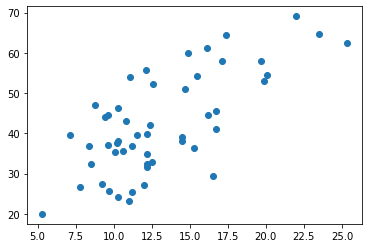

In [4]:
plt.scatter(data['PovPct'], data['TeenBrth']) 

In [14]:
x = data['PovPct']
y= data['TeenBrth']


In [8]:
np.mean(xi)

13.11764705882353

In [287]:
def linreg(X_train, y_train):
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    n = len(X_train)
    slope = (n * np.sum(X_train * y_train) - np.sum(X_train) * np.sum(y_train)) / \
            (n * np.sum(X_train ** 2) - np.sum(X_train) ** 2)
    intercept = np.mean(y_train) - slope * np.mean(X_train)
    return slope, intercept


In [288]:
slope , interncept = linreg(x,y)
y_hat = slope * x + interncept

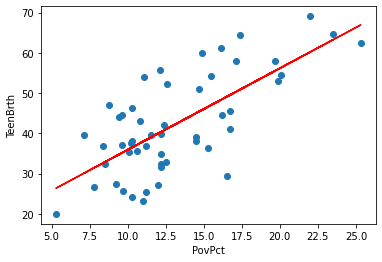

In [289]:
plt.scatter(data['PovPct'], data['TeenBrth']) 
plt.plot(data['PovPct'],y_hat,color='r')
plt.xlabel("PovPct")
plt.ylabel("TeenBrth")

plt.show()

## Exercise

This time, do it the right way. Do a regression for three different train and test divisions, and then calculate the MSE for each one. Plot the three regressions.

In [293]:
 # Randomly reorder indices
np.random.seed(5)
shuffled_indices = np.random.permutation(data.index)
data_shuffled = data.loc[shuffled_indices].reset_index(drop=True)

# Split data into train and test sets
train_size = int(0.32 * len(data))
X_train = data_shuffled.loc[:train_size, 'PovPct'].reset_index(drop=True)
y_train = data_shuffled.loc[:train_size, 'TeenBrth'].reset_index(drop=True)
X_validation = data_shuffled.loc[train_size:train_size*2, 'PovPct'].reset_index(drop=True)
y_validation = data_shuffled.loc[train_size:train_size*2, 'TeenBrth'].reset_index(drop=True)
X_test = data_shuffled.loc[train_size*2:, 'PovPct'].reset_index(drop=True)
y_test = data_shuffled.loc[train_size*2:, 'TeenBrth'].reset_index(drop=True)

In [294]:
MSE1_scores = []
MSE2_scores = []
MSE3_scores = []

# Fit a linear regression model
slope1, intercept1 = linreg(X_train, y_train)

# Calculate predictions on test set and evaluate model performance
y_pred1 = slope1 * X_train + intercept1
MSE1 = np.mean((y_train - y_pred1) ** 2)
MSE1_scores.append(MSE1)

# Fit a linear regression model
slope2, intercept2 = linreg(X_validation, y_validation)

# Calculate predictions on test set and evaluate model performance
y_pred2 = slope2 * X_validation + intercept2
MSE2 = np.mean((y_validation - y_pred2) ** 2)
MSE2_scores.append(MSE2)

# Fit a linear regression model
slope3, intercept3 = linreg(X_test, y_test)

# Calculate predictions on test set and evaluate model performance
y_pred3 = slope3 * X_test + intercept3
MSE3 = np.mean((y_test - y_pred3) ** 2)
MSE3_scores.append(MSE3)



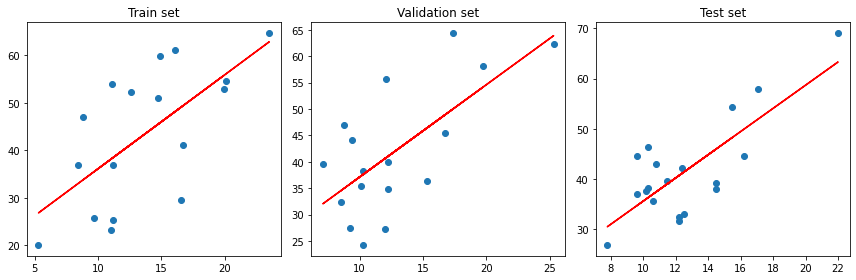

In [296]:
fig,axs=plt.subplots(1,3,figsize=(12,4),tight_layout=True)
# Plot regression line and test set
axs[0].scatter(X_train, y_train)
axs[0].plot(X_train, y_pred1, color='red')
axs[0].set_title("Train set")

axs[1].scatter(X_validation, y_validation)
axs[1].plot(X_validation, y_pred2, color='red')
axs[1].set_title("Validation set")

axs[2].scatter(X_test, y_test)
axs[2].plot(X_test, y_pred3, color='red')
axs[2].set_title("Test set")


plt.show()

# Multiple Linear Regression

The same can be done but with multiple attributes. In this case, there will be one coefficient for each attribute:  

$$y = \beta_{0} + \beta_{1}x_{1} + \beta_{2}x_{2} + ... + \beta_{n}x_{n} + \epsilon$$  


Use the following dataset, to predict the G3 column. It is the grade of the year for the students. Multiple variables are categorical, remember to convert them to numerical. Other columns might not add value to the prediction, so you can also do some feature engineering. 

Usually while computing regression, we need to add a new column for the intercept term, in the data. That way we can do:
$$f(x') = \beta^{'T}x'$$
Because $\beta'$ will contain the intercept term, $\beta' = (\beta_{0},\beta_{1},...,\beta_{n})$

That gives us the following equation:

$$y = X*\beta+\epsilon$$

The optimization problem is to find the $\hat\beta$ that minimize the loss $L(\hat{\beta}) = \hat{\epsilon}^{T}\hat{\epsilon}$
The solution is:

$$\hat{\beta} = (X^{T}X)^{-1}X^{T}y$$

Inverting takes $O(n^{3})$ so it is unfeasible for datasets with many dimensions.

In [134]:
X = data[['PovPct','ViolCrime']]
y = data['TeenBrth']

In [135]:
X = X.to_numpy()
y = y.to_numpy()

In [137]:
import statsmodels.api as sm

# Polynomial Regression

What if the data is not linear? In that case, a linear regression wouldn't work because it does not capture how the data is. Then, we can try to fit a regression but in a with a higher polynomial. This can be done by transforming the data in the following way:


$$X = \begin{pmatrix}
1 & x_{1} & x_{1}^{2} & x_{1}^{3}\\
1 & x_{2} & x_{2}^{2} & x_{2}^{3}\\
\vdots & \vdots & \vdots & \vdots \\
1 & x_{3} & x_{3}^{2} & x_{3}^{3}\\
\end{pmatrix}$$

We take each input and take it into a higher polynomial. Also, include the intercept term. We can do it again by hand, but in this case, we are going to use our friend Sklearn.

In [138]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

In [139]:
def functionf(x):
    arr = []
    for i in x:
        arr.append(2-i+(i**2))
    return np.array(arr)

In [140]:
def sample_ds(n):
    x = np.random.uniform(-3,3,n)
    e = np.random.normal(0,0.4,n)
    y = np.add(functionf(x),e)
    return x,y

## Exercise

Train a linear regression for polynomials between 1 and 8, calculate the MSE for training set, validation set and test set. Generate a train set of 10 points, then a validation set of 10 points and then a test set of 1000 points. Fit a linear regression with polynomial features.

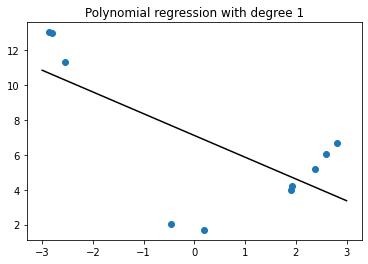

In [303]:
# Generate training, validation, and test sets
np.random.seed(123)
X_train, y_train = sample_ds(10)
X_val, y_val = sample_ds(10)
X_test, y_test = sample_ds(1000)



In [307]:
# Create polynomial design matrices
MSE_train = []
MSE_val = []
MSE_test = []
for degree in range(1, 9):
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))
    X_val_poly = poly.transform(X_val.reshape(-1, 1))
    X_test_poly = poly.transform(X_test.reshape(-1, 1))
    # Fit linear regression for each degree of polynomial
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    # Evaluate model performance on training, validation, and test sets
    y_train_pred = model.predict(X_train_poly)
    y_val_pred = model.predict(X_val_poly)
    y_test_pred = model.predict(X_test_poly)
    MSE_train.append(((y_train - y_train_pred) ** 2).mean())
    MSE_val.append(((y_val - y_val_pred) ** 2).mean())
    MSE_test.append(((y_test - y_test_pred) ** 2).mean())


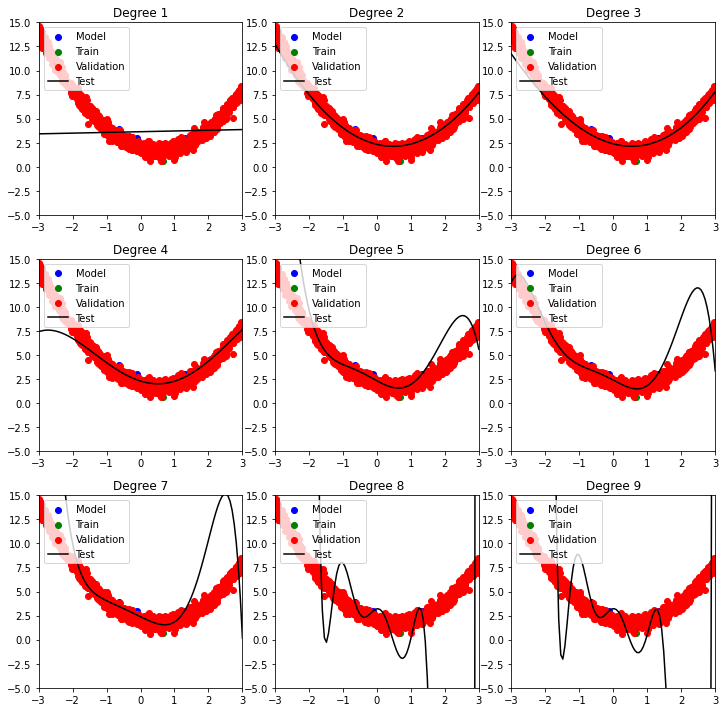

In [336]:
fig, axs = plt.subplots(3, 3, figsize=(10, 10))
for i, ax in enumerate(axs.flat):
    degree = i + 1
    ax.scatter(X_train, y_train, color='blue')
    ax.scatter(X_val, y_val, color='green')
    ax.scatter(X_test, y_test, color='red')
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train.reshape(-1, 1), y_train)
    x_plot = np.linspace(-3, 3, 100)
    y_plot = model.predict(x_plot.reshape(-1, 1))
    ax.plot(x_plot, y_plot, color='black')
    ax.set_title(f"Degree {degree}")
    ax.set_xlim([-3, 3])
    ax.set_ylim([-5, 15])
    ax.legend(["Model", "Train", "Validation", "Test"], loc="upper left")
plt.tight_layout()
plt.show()